<a href="https://colab.research.google.com/github/jamalromero/colab/blob/main/3_1_Shallow_Networks_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Deep Learning [book](https://udlbook.github.io/udlbook/)
## Notebook 3.1 - Shallow networks I

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Keep Python runtime and install java

In [ ]:
!apt install openjdk-17-jdk

Install Juyter Java kernel

In [ ]:
!pip install jbang
import jbang
jbang.exec("trust add https://github.com/jupyter-java")
jbang.exec("install-kernel@jupyter-java")

Change Runtime to Java kernel and test Java runtime.

In [ ]:
System.getProperty("java.version")

Load external script to include maven dependency, import packages and intial startup script. Example:

```
%%loadFromPOM
<dependency>
    <groupId>tech.tablesaw</groupId>
    <artifactId>tablesaw-core</artifactId>
    <version>0.43.1</version>
</dependency>

import java.util.stream.*;

System.getProperty("java.version");

```



In [5]:
%load /content/drive/MyDrive/colab/init_script.ipynb

In [ ]:
NDManager manager = NDManager.newBaseManager();

## Shallow neural networks I
The purpose of this notebook is to gain some familiarity with shallow neural networks with 1D inputs. It works through an example similar to figure 3.3 and experiments with different activation functions.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.


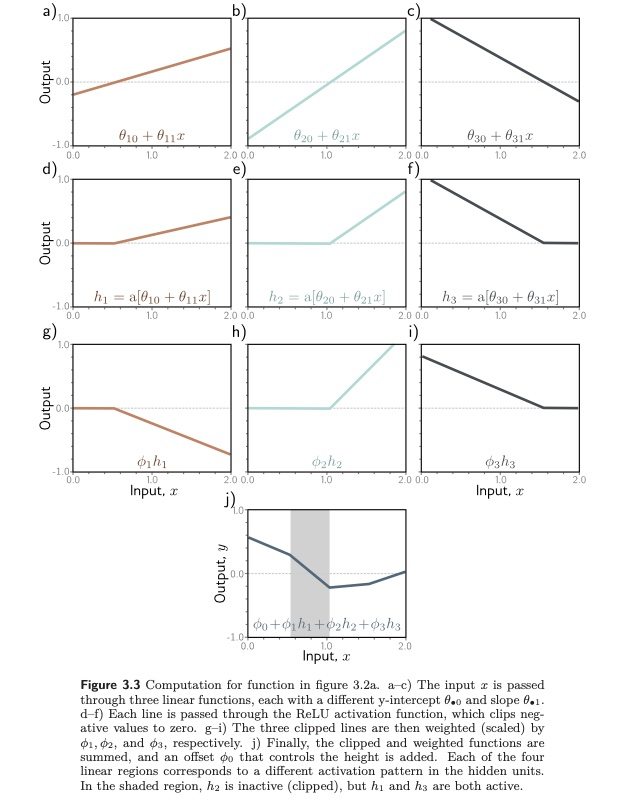

In [10]:
//Define the Rectified Linear Unit (ReLU) function
NDArray relu(NDArray preactivation) {
  return preactivation.maximum(0);
}

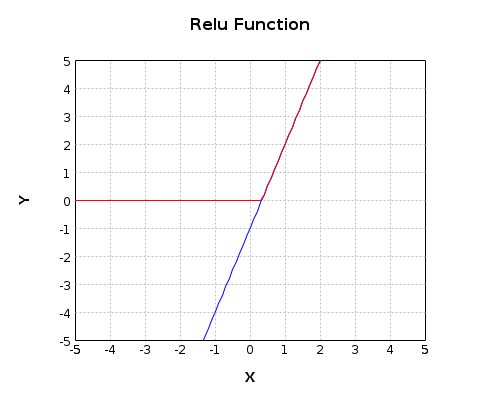

In [12]:
// Make an array of inputs
NDArray inputs = manager.arange(-5f, 5f, 0.1f).toType(DataType.FLOAT64, true);
NDArray preactivated_output = inputs.mul(3).add(-1);
NDArray activated_output = relu(preactivated_output);

// Plot the Relu function
var canvas = LinePlot.of(toDoubleArray(inputs.stack(preactivated_output, 1)), Color.BLUE).canvas();
canvas.add(LinePlot.of(toDoubleArray(inputs.stack(activated_output, 1)), Color.RED));
canvas.setBound(new double[]{-5, -5}, new double[]{5, 5});
canvas.setTitle("Relu Function");
canvas.toBufferedImage(500, 400)

## Define a shallow neural network with, one input, one output, and three hidden units
Hidden units:
\begin{equation}h_1 = \theta_{10} + \theta_{11}x\end{equation}
\begin{equation}h_2 = \theta_{20} + \theta_{21}x\end{equation}
\begin{equation}h_2 = \theta_{30} + \theta_{31}x\end{equation}

Then combine the hidden units with a linear function:
\begin{equation}y = \phi_0 + \phi_1 h_1 + \phi_2 h_2 + \phi_3 h_3\end{equation}

Define a shallow neural network with, one input, one output, and three hidden units

In [14]:
// Define the parameters of the network
double theta_10 =  0.3; double theta_11 = -1;
double theta_20 = -1; double theta_21 = 2;
double theta_30 = -0.5; double theta_31 = 0.65;
double phi_0 = -0.3; double phi_1 = 2; double phi_2 = -1; double phi_3 = 7;

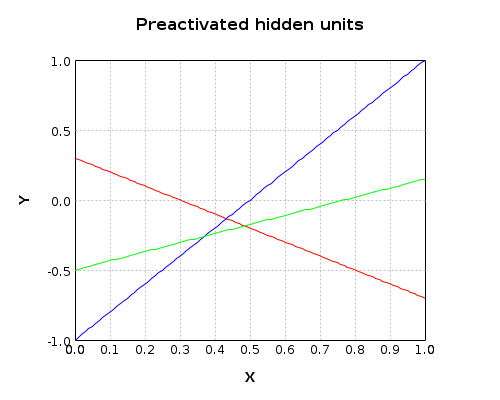

In [16]:
// Plot the preactivated outputs
var x = manager.arange(0f, 1f, 0.01f).toType(DataType.FLOAT64, true);
var canvas = LinePlot.of(toDoubleArray(x.stack(x.mul(theta_11).add(theta_10), 1)), Color.RED).canvas();
canvas.add(LinePlot.of(toDoubleArray(x.stack(x.mul(theta_21).add(theta_20), 1)), Color.BLUE));
canvas.add(LinePlot.of(toDoubleArray(x.stack(x.mul(theta_31).add(theta_30), 1)), Color.GREEN));
canvas.setBound(new double[]{0, -1}, new double[]{1, 1});
canvas.setTitle("Preactivated hidden units");
canvas.toBufferedImage(500, 400);


Plot the activated hidden units

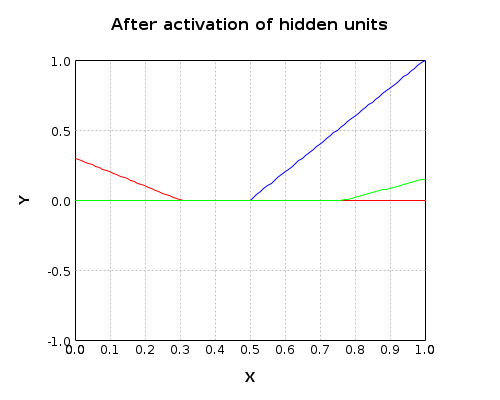

In [18]:
var canvas = LinePlot.of(toDoubleArray(x.stack(relu(x.mul(theta_11).add(theta_10)), 1)), Color.RED).canvas();
canvas.add(LinePlot.of(toDoubleArray(x.stack(relu(x.mul(theta_21).add(theta_20)), 1)), Color.BLUE));
canvas.add(LinePlot.of(toDoubleArray(x.stack(relu(x.mul(theta_31).add(theta_30)), 1)), Color.GREEN));
canvas.setBound(new double[]{0, -1}, new double[]{1, 1});
canvas.setTitle("After activation of hidden units");
canvas.toBufferedImage(500, 400);

Combine linearly the activated hidden units and plot the output
\begin{equation}y = \phi_0 + \phi_1 h_1 + \phi_2 h_2 + \phi_3 h_3\end{equation}

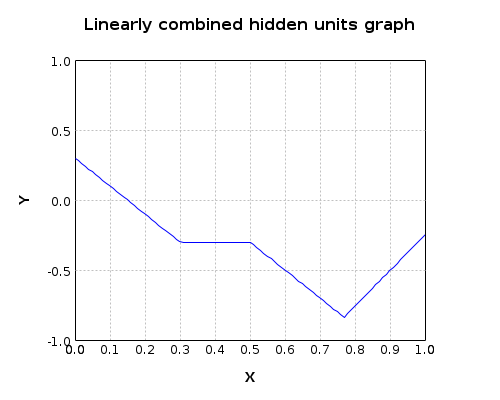

In [20]:
Canvas plotNetwork(double theta_10, double theta_11,
                 double theta_20, double theta_21,
                 double theta_30, double theta_31,
                 double phi_0, double phi_1, double phi_2, double phi_3) {
  NDArray h1 = relu(x.mul(theta_11).add(theta_10));
  NDArray h2 = relu(x.mul(theta_21).add(theta_20));
  NDArray h3 = relu(x.mul(theta_31).add(theta_30));
  NDArray y = h1.mul(phi_1).add(h2.mul(phi_2)).add(h3.mul(phi_3)).add(phi_0);
  var canvas = LinePlot.of(toDoubleArray(x.stack(y, 1)), Color.BLUE).canvas();
  canvas.setBound(new double[]{0, -1}, new double[]{1, 1});
  canvas.setTitle("Linearly combined hidden units graph");
  return canvas;
}

plotNetwork(theta_10, theta_11, theta_20, theta_21, theta_30, theta_31, phi_0, phi_1, phi_2, phi_3).toBufferedImage(500, 400);

## Questions:

1) Predict what effect changing $\phi_0$ will have on the network.
\begin{equation}y = \phi_0 + \phi_1 h_1 + \phi_2 h_2 + \phi_3 h_3\end{equation}

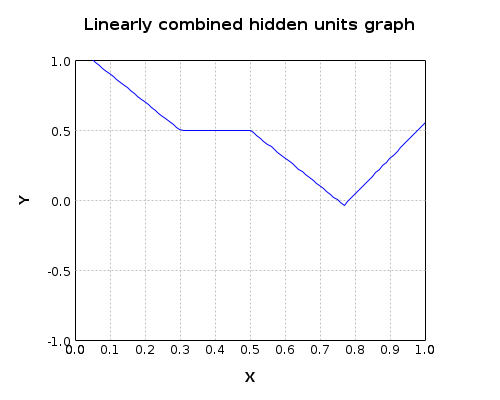

In [22]:
plotNetwork(theta_10, theta_11, theta_20, theta_21, theta_30, theta_31, 0.5, phi_1, phi_2, phi_3).toBufferedImage(500, 400);

Changing $\phi_0$ will offset the whole graph up or down.


---



2) Predict what effect multiplying $\phi_1$, $\phi_2$, $\phi_3$ by 0.5 would have.  Check if you are correct
\begin{equation}y = \phi_0 + \phi_1 h_1 + \phi_2 h_2 + \phi_3 h_3\end{equation}

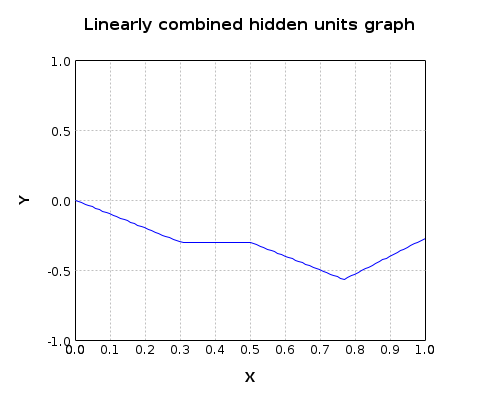

In [24]:
double factor = 0.5;
plotNetwork(theta_10, theta_11, theta_20, theta_21, theta_30, theta_31, phi_0, phi_1*factor, phi_2*factor, phi_3*factor).toBufferedImage(500, 400);

 Changing $\phi_1, \phi_2, \phi_3$ will flatten or fold the network graph


---



3) Predict what effect multiplying $\phi_1$ by -1 will have.  Check if you are correct.
\begin{equation}y = \phi_0 + \phi_1 h_1 + \phi_2 h_2 + \phi_3 h_3\end{equation}



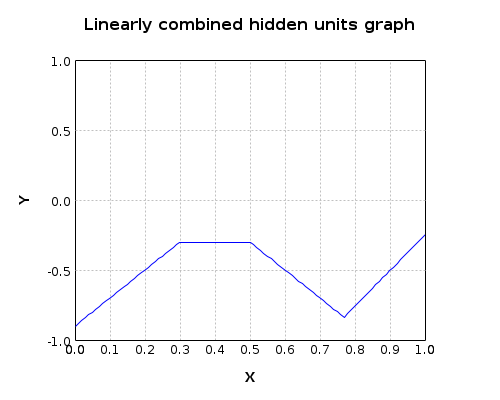

In [26]:
plotNetwork(theta_10, theta_11, theta_20, theta_21, theta_30, theta_31, phi_0, phi_1 * -1, phi_2, phi_3).toBufferedImage(500, 400);

The slope of the first linear region has changed


---



4) Predict what effect setting $\theta_{20}$ to -1.2 will have.  Check if you are correct.
\begin{equation}y = \phi_0 + \phi_1 h_1 + \phi_2 h_2 + \phi_3 h_3\end{equation}

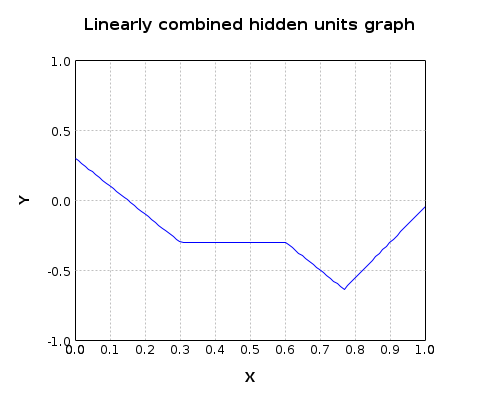

In [28]:
plotNetwork(theta_10, theta_11, -1.2, theta_21, theta_30, theta_31, phi_0, phi_1, phi_2, phi_3).toBufferedImage(500, 400);

The second linear region becomes wider


---



5) Change the parameters so that there are only two "joints" (including outside the range of the plot)

**Note:** There are actually three ways to do this. See if you can figure them all out
\begin{equation}y = \phi_0 + \phi_1 h_1 + \phi_2 h_2 + \phi_3 h_3\end{equation}

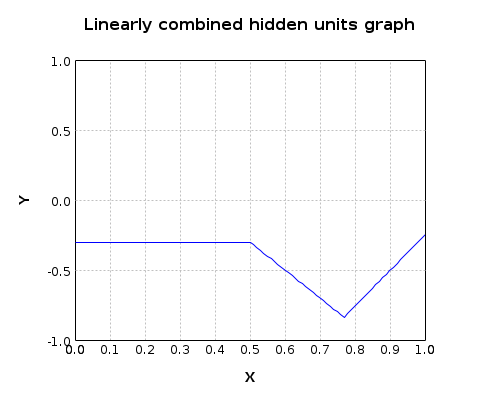

In [89]:
plotNetwork(theta_10, theta_11, theta_20, theta_21, theta_30, theta_31, phi_0, 0, phi_2, phi_3).toBufferedImage(500, 400);

Setting $\phi_1=0$ or $\phi_2=0$ or $\phi_3=0$, the graph will have just two joints.

Also calculating the $x$ coordinates of the three joints as follows:

$θ_{10} + θ_{11}x = 0 \implies x = \frac{-θ_{10}}{θ_{11}}$

$θ_{20} + θ_{21}x = 0 \implies x = \frac{-θ_{20}}{θ_{21}}$

$θ_{30} + θ_{31}x = 0 \implies x = \frac{-θ_{30}}{θ_{31}}$

Then:

If $\frac{-θ_{10}}{θ_{11}} = \frac{-θ_{20}}{θ_{21}}$

or $\frac{-θ_{10}}{θ_{11}} = \frac{-θ_{30}}{θ_{31}}$

or $\frac{-θ_{20}}{θ_{21}} = \frac{-θ_{30}}{θ_{31}}$

The graph also will have only two joints


---



6) With the original parameters, the second line segment is flat (i.e. has slope zero)

How could you change $\theta_{10}$ so that all of the segments have non-zero slopes
\begin{equation}y = \phi_0 + \phi_1 h_1 + \phi_2 h_2 + \phi_3 h_3\end{equation}

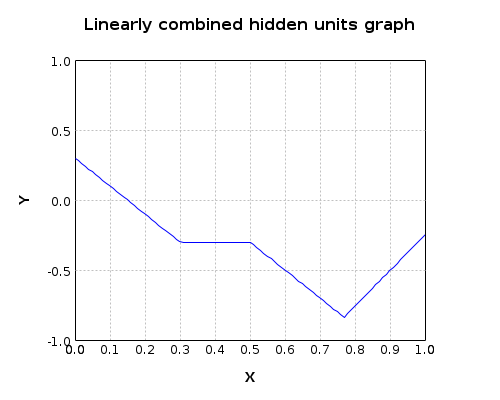

In [51]:
plotNetwork(theta_10, theta_11, theta_20, theta_21, theta_30, theta_31, phi_0, phi_1, phi_2, phi_3).toBufferedImage(500, 400);